##  Data Preprocessing

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sp 
import warnings ## used to ignore warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [2]:
df = pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv',encoding='windows-1252')

In [3]:
# set the  maxmium number of column to display  
pd.options.display.max_columns = None 
# set the maxmium number of rows to display 
pd.options.display.max_rows = None 

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.duplicated().sum()

0

In [8]:
df_cat = df[['Ship Mode', 'Customer ID', 'Customer Name',
             'Segment', 'Country', 'City', 'State', 'Region',
             'Product ID', 'Category', 'Sub-Category', 'Product Name','Order Date' ,'Ship Date']]

In [9]:
df_cat.head()

,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Order Date,Ship Date
0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2016,11/11/2016
1,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2016,11/11/2016
2,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2016,6/16/2016
3,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2015,10/18/2015
4,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2015,10/18/2015


In [10]:
# shown the  number of unique values of categorical data 
for feature in df_cat.columns:
    print(feature, ":" ,df[feature].nunique())

Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850
Order Date : 1237
Ship Date : 1334


In [11]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [12]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### outliers 
#### We have some outliers in Sales, Quantity, Profit. Remove the outliers.

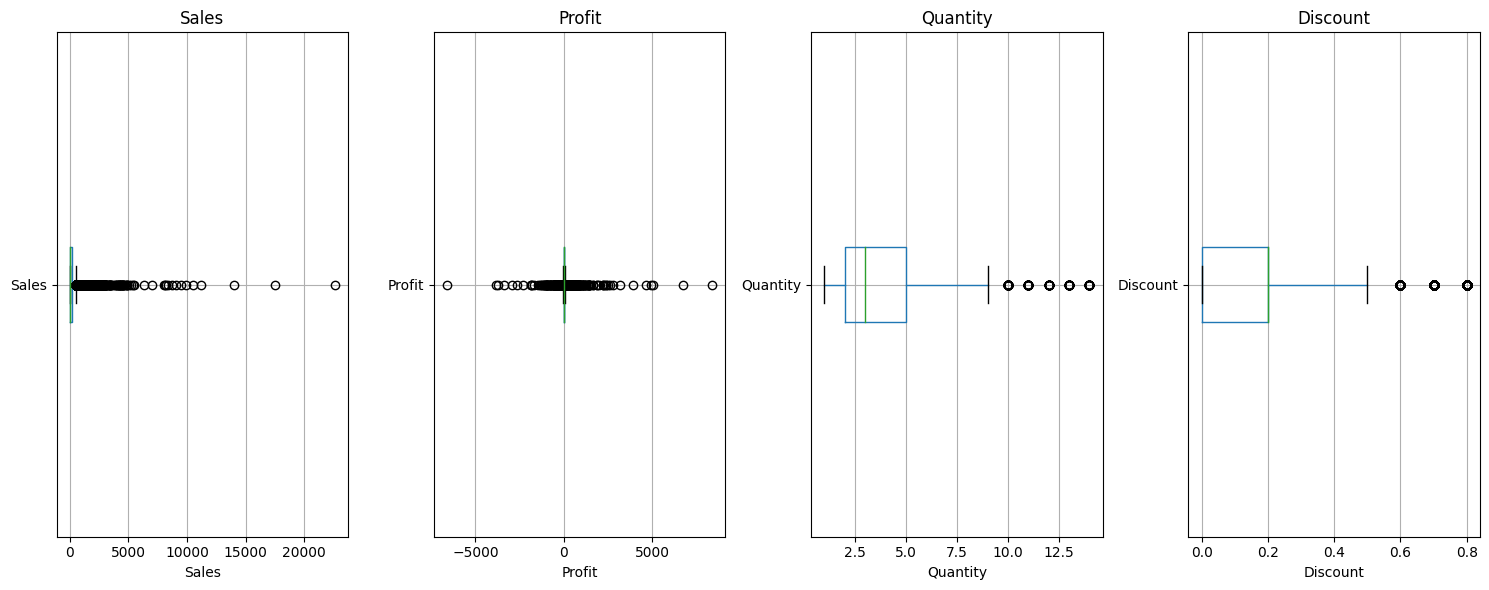

In [13]:
numerical_columns = ["Sales", "Profit", "Quantity", "Discount"]
ncols = len(numerical_columns)  # Calculate number of columns

# Create the figure and axes with better aspect ratio
fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(15, 6))  # Adjust figure size as needed

# Create boxplots with labels and titles
for i, col in enumerate(numerical_columns):
    df.boxplot(column=col, ax=axes[i], vert=False)  # Improved orientation for wider figure
    axes[i].set_xlabel(col)
    axes[i].set_title(col)

# Adjust layout and spacing
plt.tight_layout()
plt.show()


In [14]:
def remove_outliers(df,col):
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3-Q1

    filter = (df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)
    removed_count = np.sum(filter==False)
    tot = len(df)
    df = df.loc[filter]
    print(f"Removed {removed_count} outliers from {tot} rows.")
    return df

## Exploratory Data Analysis - EDA

## 1- Product analysis 
 #### What are the top selling and top Profitable products in the superstore?
 #### Which category of products generates the highest revenue and profit?
 #### Which sub-category of products has the highest demand?
 #### What is the average profit margin for each product category?
 #### What is the impact of discounts on sales?
## 2-Geographical analysis 
#### Which region & place generates the most sales and profits?
## 3- time series 
#### What is the sales trend over time (monthly, yearly)?
## 4- segment analysis
#### Can we tailor marketing and promotions to target consumer segments that are more likely to use standard-class shipping?


In [15]:
product_group = df.groupby(["Product Name"]).sum()["Sales"]

In [16]:
product_group.head()

Product Name
"While you Were Out" Message Book, One Form per Page     25.228
#10 Gummed Flap White Envelopes, 100/Box                 41.300
#10 Self-Seal White Envelopes                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                 286.672
Name: Sales, dtype: float64

In [17]:
top_selling_products = product_group.sort_values(ascending=False)
top5_selling_products = pd.DataFrame(top_selling_products[:5])
top5_selling_products

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479


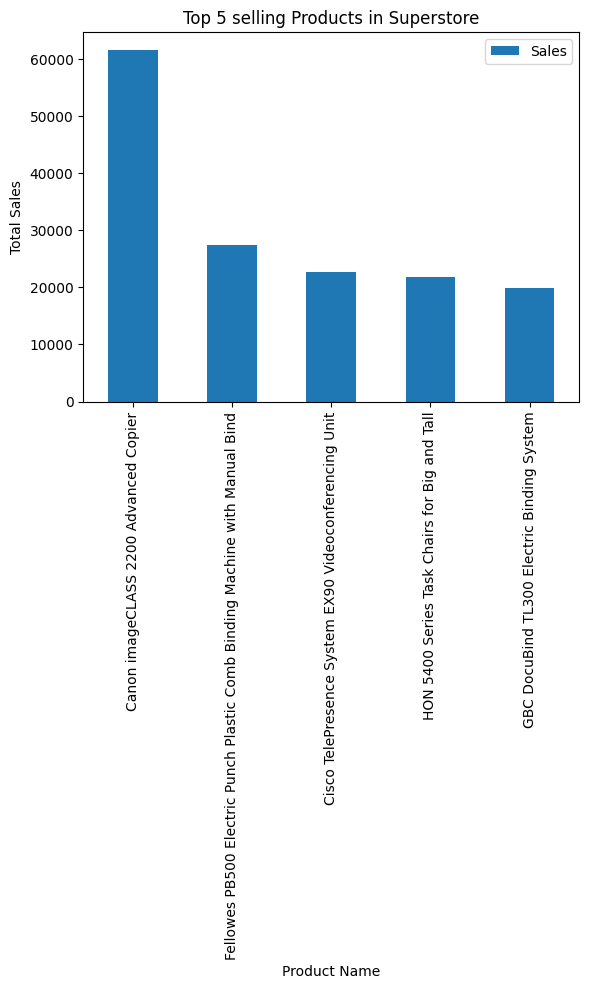

In [18]:
top5_selling_products.plot(kind="bar")
plt.title ("Top 5 selling Products in Superstore")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.show()

In [19]:
product_group = df.groupby(["Product Name"]).sum()["Profit"]
top_5_profit = product_group.sort_values(ascending = False)
top_5_profit = pd.DataFrame(top_5_profit[:5])
top_5_profit

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766


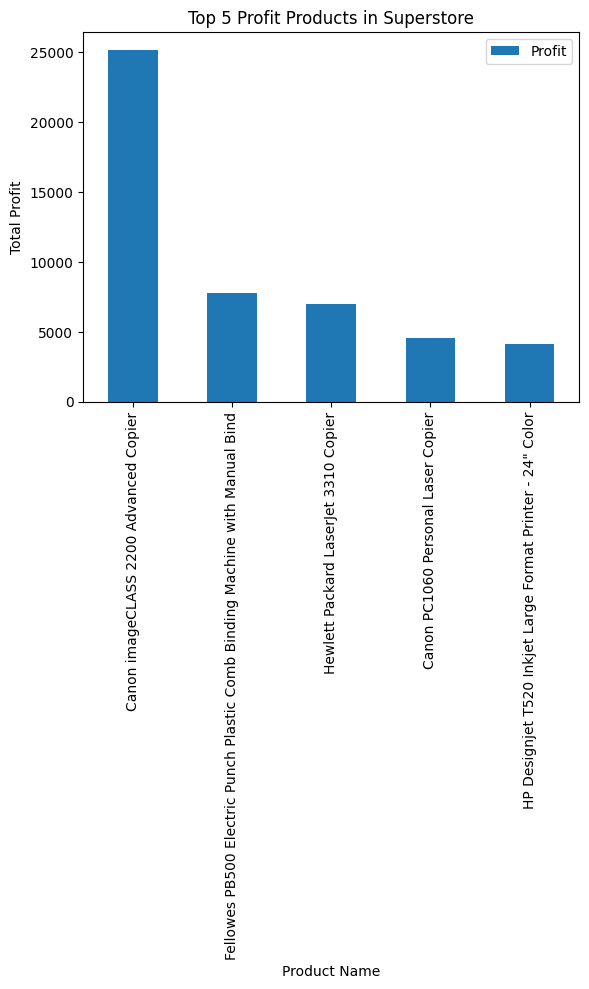

In [20]:
top_5_profit.plot(kind="bar")
plt.title("Top 5 Profit Products in Superstore")
plt.xlabel("Product Name")
plt.ylabel("Total Profit")
plt.show()

### Are the top-selling products the most profitable?

In [21]:
top5_selling_products.index == top_5_profit.index

array([ True,  True, False, False, False])

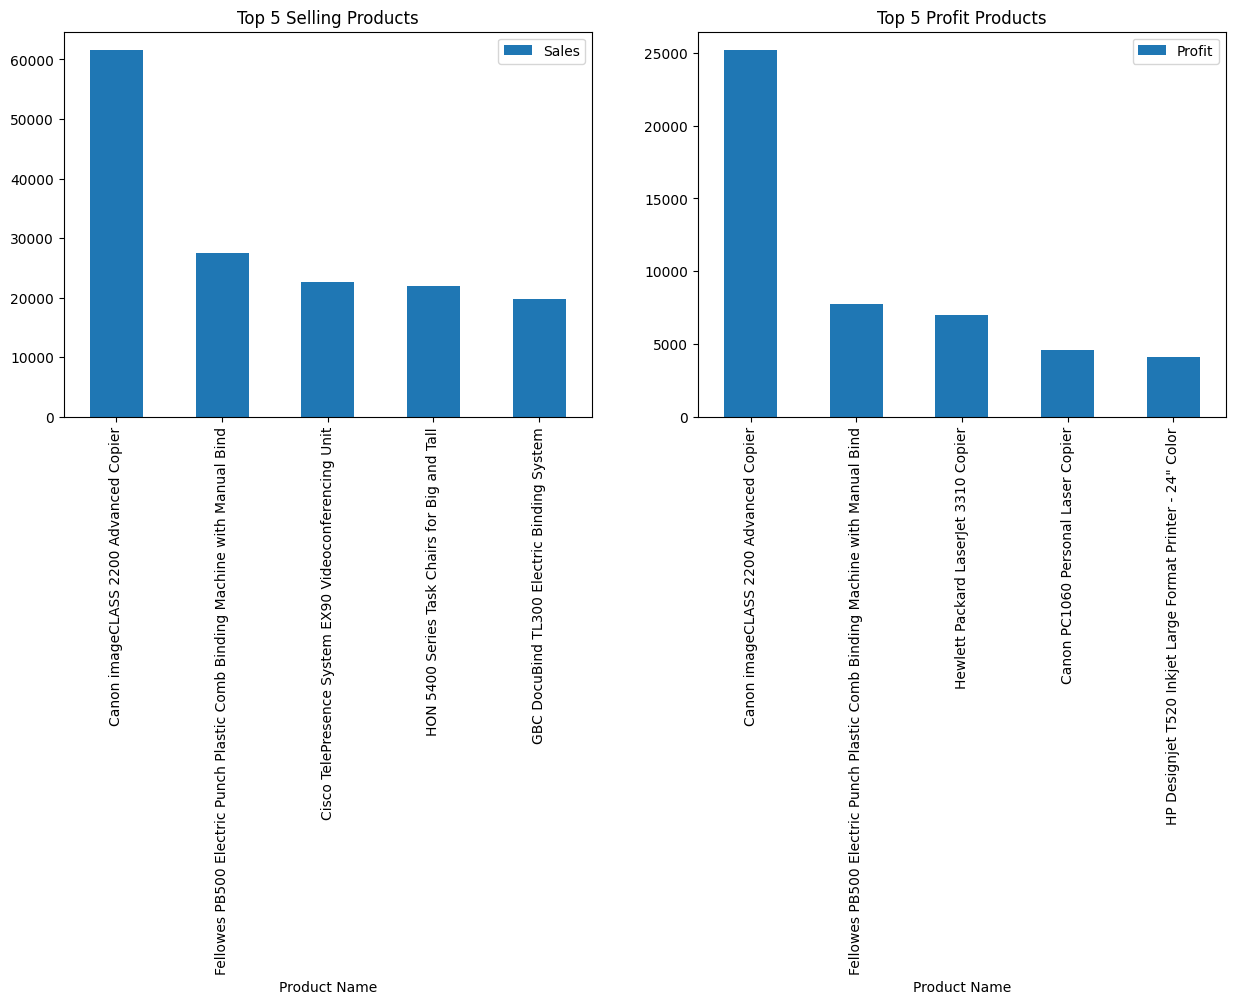

In [22]:
fig,(ax1,ax2) = plt.subplots(1,2 , figsize=(15,5))
top5_selling_products.plot(kind="bar",y="Sales", ax=ax1 )
ax1.set_title("Top 5 Selling Products")
top_5_profit.plot(kind="bar", y="Profit", ax=ax2)
ax2.set_title("Top 5 Profit Products")
plt.show()

In [23]:
category_group = df.groupby(["Category"]).sum()["Sales"]

In [24]:
category_group

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [25]:
cate_total_selling = pd.DataFrame(category_group)

In [26]:
cate_total_selling

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


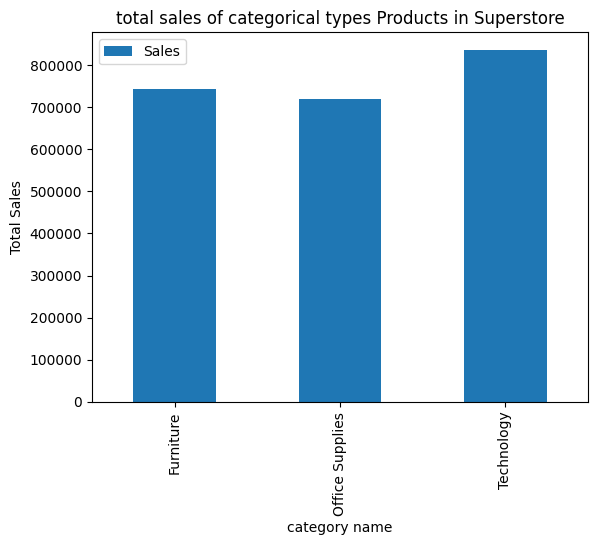

In [27]:
cate_total_selling.plot(kind="bar")
plt.title ("total sales of categorical types Products in Superstore")
plt.xlabel("category name")
plt.ylabel("Total Sales")
plt.show()

In [28]:
category_group = df.groupby(["Category"]).sum()["Profit"]
category_group

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

In [29]:
cate_total_profit = pd.DataFrame(category_group)
cate_total_profit

,Profit
Category,
Furniture,18451.2728
Office Supplies,122490.8008
Technology,145454.9481


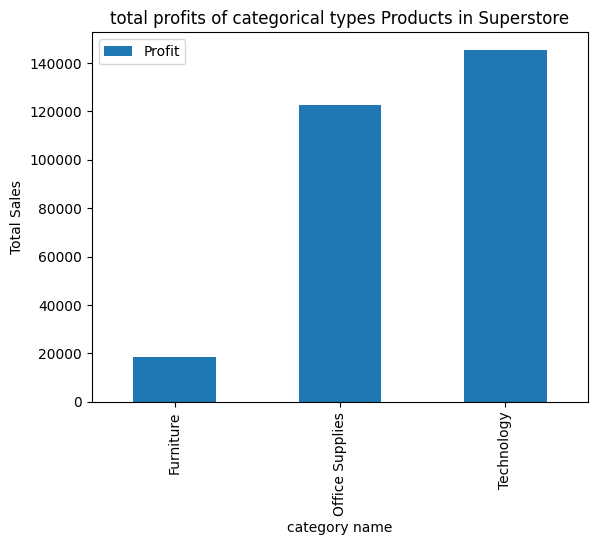

In [30]:
cate_total_profit.plot(kind="bar")
plt.title ("total profits of categorical types Products in Superstore")
plt.xlabel("category name")
plt.ylabel("Total Sales")
plt.show()

In [31]:
# total profits&sales compare by categoray
category_group = df.groupby(["Category"])[["Profit","Sales"]].sum()
category_group

,Profit,Sales
Category,,
Furniture,18451.2728,741999.7953
Office Supplies,122490.8008,719047.0320
Technology,145454.9481,836154.0330


In [32]:
cate_total = pd.DataFrame(category_group)
cate_total

,Profit,Sales
Category,,
Furniture,18451.2728,741999.7953
Office Supplies,122490.8008,719047.0320
Technology,145454.9481,836154.0330


<function matplotlib.pyplot.show(close=None, block=None)>

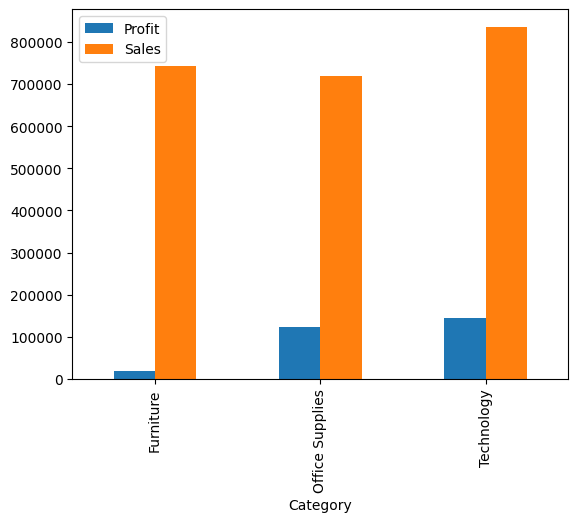

In [33]:
cate_total.plot(kind="bar")
plt.show

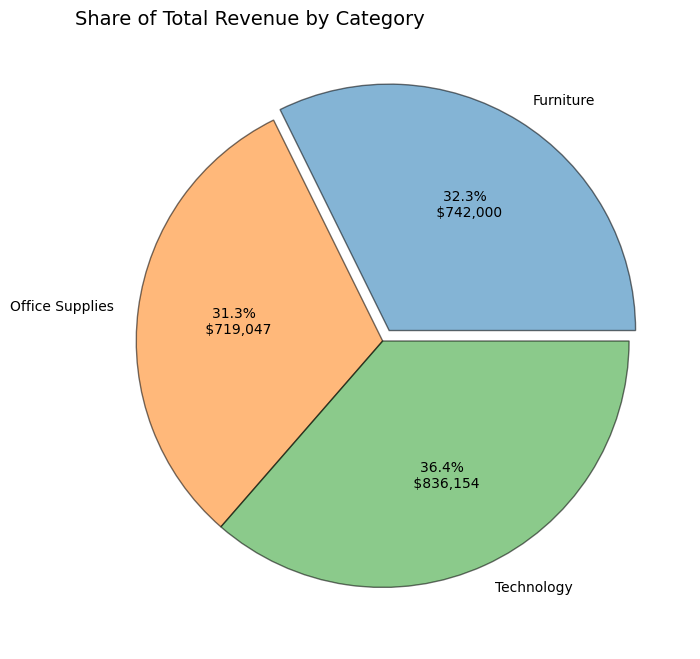

In [34]:
sales_per_category = df.groupby("Category").sum()
category_colors = ["tab:blue" if label == "Furniture" else "tab:orange" if label == "Office Supplies" else "tab:green" for label in sales_per_category.index]
fig, ax1 = plt.subplots(figsize=(8, 8))

# Plot the pie chart with labels, percentage and dollar amount annotations, customized properties and colors
wedges, texts, autotexts = ax1.pie(sales_per_category["Sales"], labels=sales_per_category.index,
                                  autopct=lambda p: f"{p:.1f}% \n ${p*np.sum(sales_per_category['Sales'])/100:,.0f}",
                                  wedgeprops={"linewidth": 1, "edgecolor": "black", "alpha": 0.55},
                                  colors=category_colors, explode=[0.05, 0, 0])

# Set title and customize appearance
ax1.set_title("Share of Total Revenue by Category", loc="left", fontdict={"fontsize": 14})

plt.show()

<Axes: xlabel='Sub-Category'>

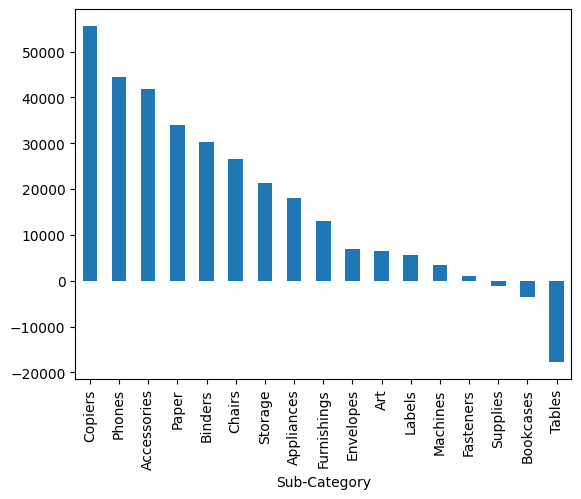

In [35]:
df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).plot.bar()


<Axes: xlabel='Sub-Category'>

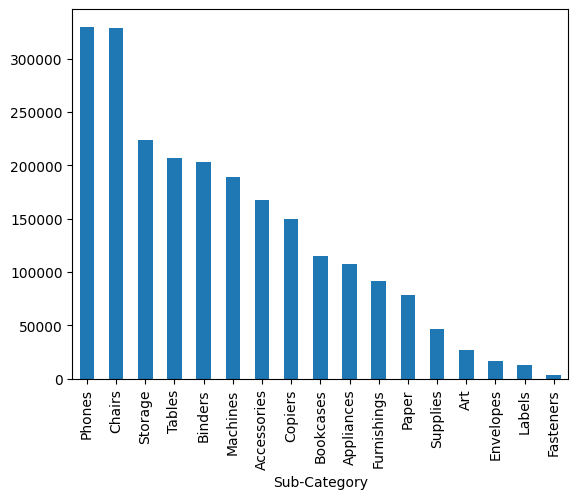

In [36]:
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar()

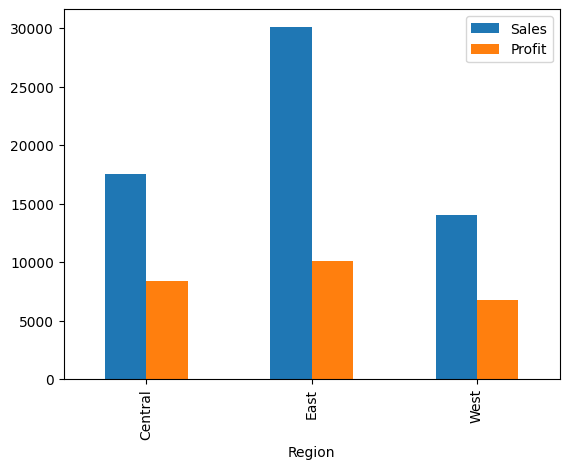

In [37]:
# Filter the data to only include the Canon imageCLASS 2200 Advanced Copier
product = df[df["Product Name"] == "Canon imageCLASS 2200 Advanced Copier"]

# Group the data by Region
region_group = product.groupby(["Region"]).sum()[["Sales", "Profit"]]

# Ploting
region_group.plot(kind="bar")

plt.show()

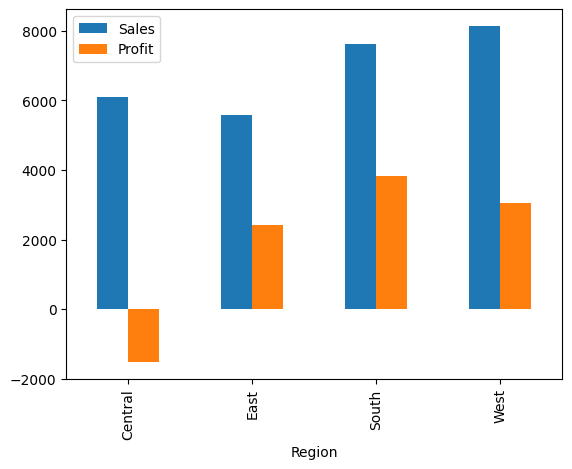

In [38]:
product = df[df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind"]

# Group the data by Region 
region_group = product.groupby(["Region"]).sum()[["Sales", "Profit"]]

# Plot the average sales and profit by region
region_group.plot(kind="bar")

# Show the plot
plt.show()

In [39]:
product = df[
    (df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") &
    (df["Region"] == "Central")
]
product

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2846,2847,CA-2017-152093,9/10/2017,9/15/2017,Standard Class,SN-20560,Skye Norling,Home Office,United States,Chicago,Illinois,60653,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,762.594,3,0.8,-1143.891
5310,5311,CA-2017-131254,11/19/2017,11/21/2017,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,Texas,77095,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.782
7683,7684,CA-2015-120782,4/28/2015,5/1/2015,First Class,SD-20485,Shirley Daniels,Home Office,United States,Midland,Michigan,48640,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,3812.970,3,0.0,1906.485


## conclude 
#### top_5_selling_products: 
- Canon imageCLASS 2200 Advanced Copier
- Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
- Cisco TelePresence System EX90 Videoconferencing Unit
- HON 5400 Series Task Chairs for Big and Tall
- GBC DocuBind TL300 Electric Binding System

#### top_5_profit_products:
- Canon imageCLASS 2200 Advanced Copier
- Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
- Hewlett Packard LaserJet 3310 Copier
- Canon PC1060 Personal Laser Copier
- HP Designjet T520 Inkjet Large Format Printer - 24" Color

#### The highest selling products, and the most profitable

- Canon imageCLASS 2200 Advanced Copier
- Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind

## What is the impact of discounts on sales?

In [40]:
df.Discount.value_counts()

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

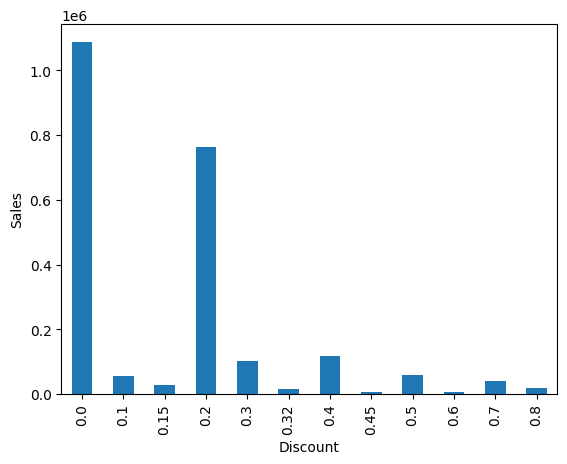

In [41]:
group_discounts = df.groupby(["Discount"]).sum()["Sales"]
ax = group_discounts.plot(kind="bar")
ax.set_ylabel("Sales")
plt.show()

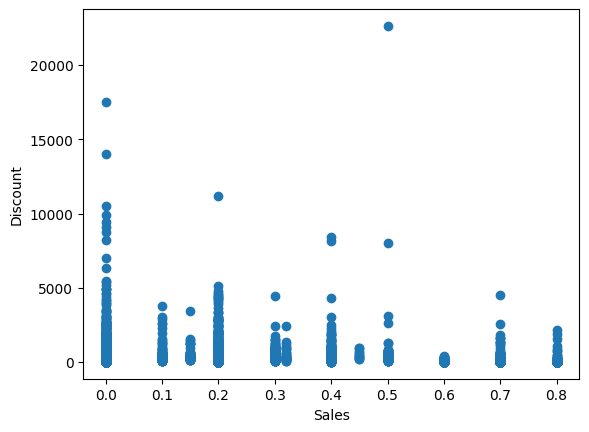

In [42]:
plt.scatter(df['Discount'], df['Sales'])

plt.ylabel("Discount")
plt.xlabel("Sales")
plt.show()

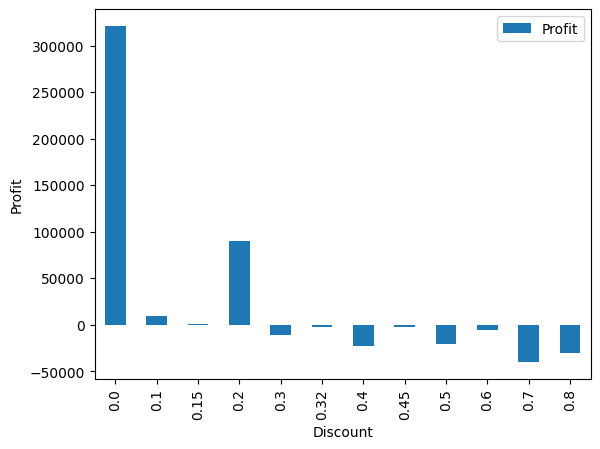

In [43]:
# Group the data by the discount and compute the average sales
discount_group = df.groupby(["Discount"]).sum()[["Profit"]]

ax = discount_group.plot(kind="bar")

ax.set_ylabel("Profit")

plt.show()

## the best salles
### The best sales are when the discount is 50%, but this leads to loss and non-profitability.
### The discount from 10 to 20%. Is the best solution, as they are the second and third best sellers and make profits

## Geographical analysis 
### Which region & place generates the most sales and profits?

In [44]:
df_places = df[['Country','City','State','Region']]
df_places.head()

,Country,City,State,Region
0,United States,Henderson,Kentucky,South
1,United States,Henderson,Kentucky,South
2,United States,Los Angeles,California,West
3,United States,Fort Lauderdale,Florida,South
4,United States,Fort Lauderdale,Florida,South


In [45]:
for place in df_places.columns : 
    print(place, ":", df_places[place].nunique())

Country : 1
City : 531
State : 49
Region : 4


In [46]:
df_places = df[['City','State','Region','Sales','Profit']]

In [47]:
df_places.head()

,City,State,Region,Sales,Profit
0,Henderson,Kentucky,South,261.9600,41.9136
1,Henderson,Kentucky,South,731.9400,219.5820
2,Los Angeles,California,West,14.6200,6.8714
3,Fort Lauderdale,Florida,South,957.5775,-383.0310
4,Fort Lauderdale,Florida,South,22.3680,2.5164


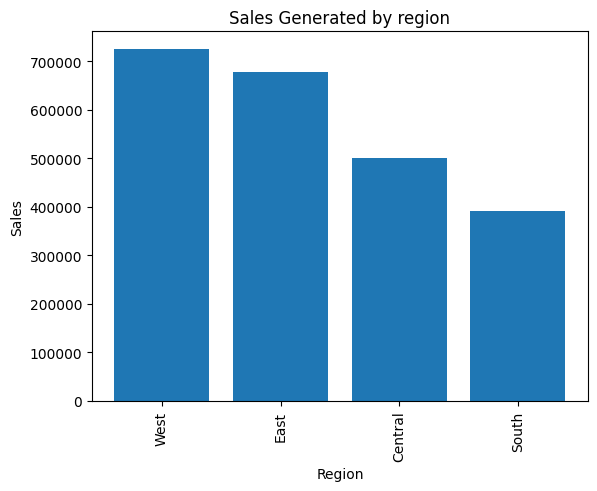

In [48]:
grouped_place = df.groupby(["Region"],as_index=False).sum()
grouped_place.sort_values(by="Sales",ascending=False , inplace=True)
plt.bar(grouped_place['Region'], grouped_place['Sales'], align='center',)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.title("Sales Generated by region")
plt.xticks(rotation=90)

plt.show()

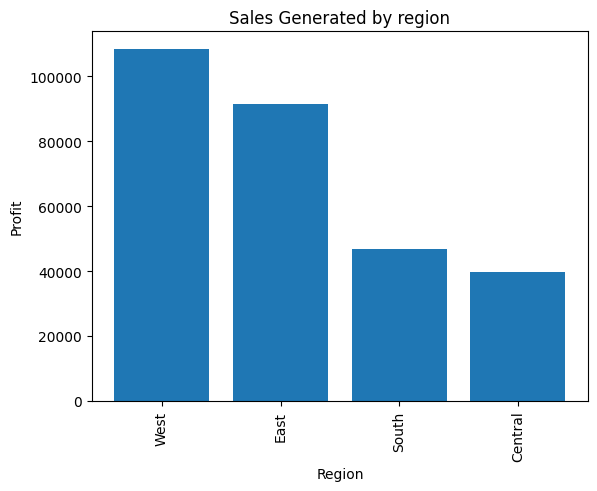

In [49]:
grouped_place = df.groupby(["Region"],as_index=False).sum()
grouped_place.sort_values(by="Profit",ascending=False , inplace=True)
plt.bar(grouped_place['Region'], grouped_place['Profit'], align='center',)
plt.xlabel("Region")
plt.ylabel("Profit")
plt.title("Sales Generated by region")
plt.xticks(rotation=90)

plt.show()

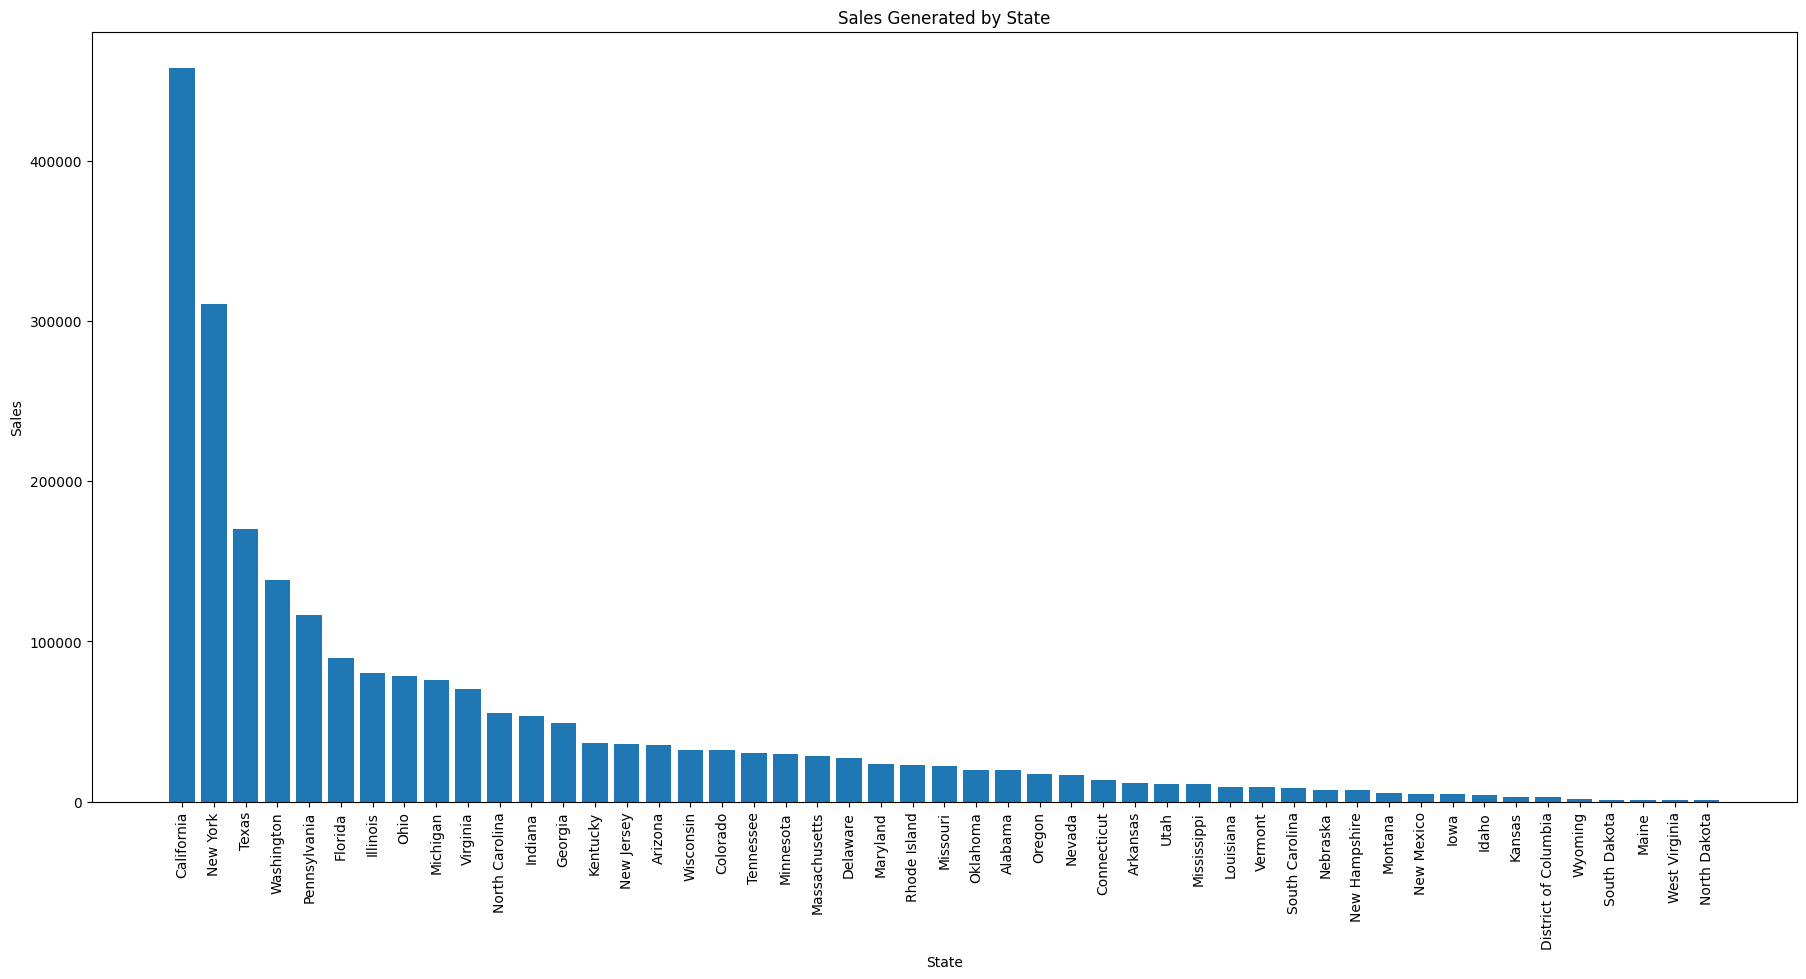

In [50]:
grouped_data = df_places.groupby(['State'], as_index=False).sum()
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)


plt.figure(figsize=(22,10))
plt.bar(grouped_data['State'], grouped_data['Sales'], align='center',)
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)

plt.show()

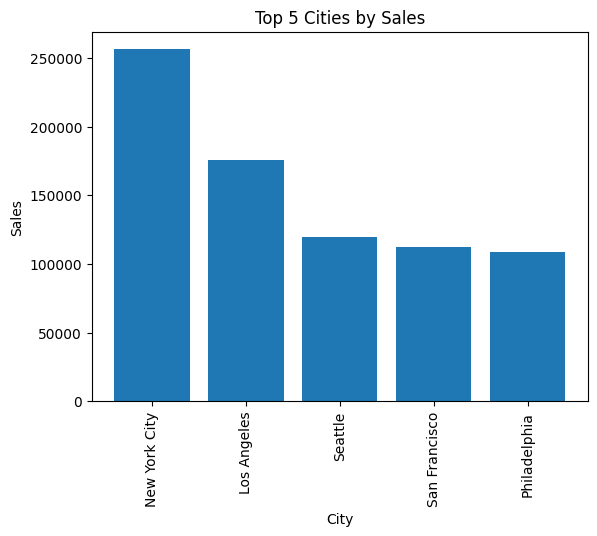

In [51]:
grouped_data = df_places.groupby('City', as_index=False).sum()

# Sort the data by Sales in descending order
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)

# Select the top 5 cities
top_5_cities = grouped_data.head()

plt.bar(top_5_cities['City'], top_5_cities['Sales'], align='center')
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("Top 5 Cities by Sales")
plt.xticks(rotation=90)

plt.show()

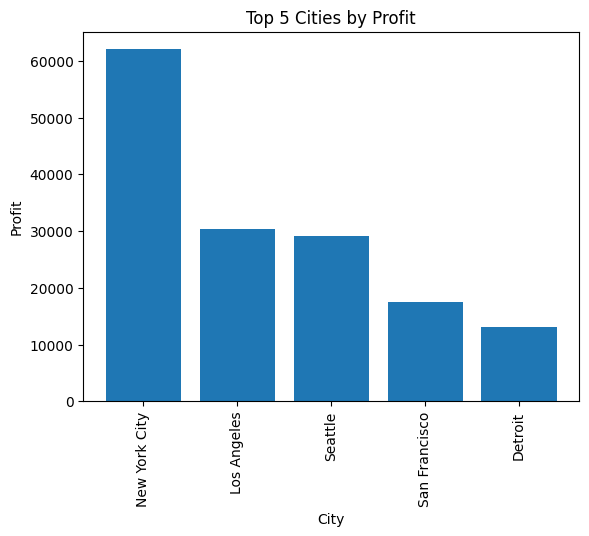

In [52]:
grouped_data = df_places.groupby('City', as_index=False).sum()

# Sort the data by Sales in descending order
grouped_data.sort_values(by='Profit', ascending=False, inplace=True)

# Select the top 5 cities
top_5_cities = grouped_data.head()

plt.bar(top_5_cities['City'], top_5_cities['Profit'], align='center')
plt.xlabel("City")
plt.ylabel("Profit")
plt.title("Top 5 Cities by Profit")
plt.xticks(rotation=90)

plt.show()

In [53]:
top_5_cities.City

329    New York City
266      Los Angeles
452          Seattle
438    San Francisco
123          Detroit
Name: City, dtype: object

### top placies are :
**Cities**: [New York City, Los Angeles, Seattle, San Francisco, Detroit]

**State** : [california, New York]

**Region** : [West]

## What is the sales trend over time (monthly, yearly)?

In [54]:
df["Order Date"] = pd.to_datetime(df['Order Date'])

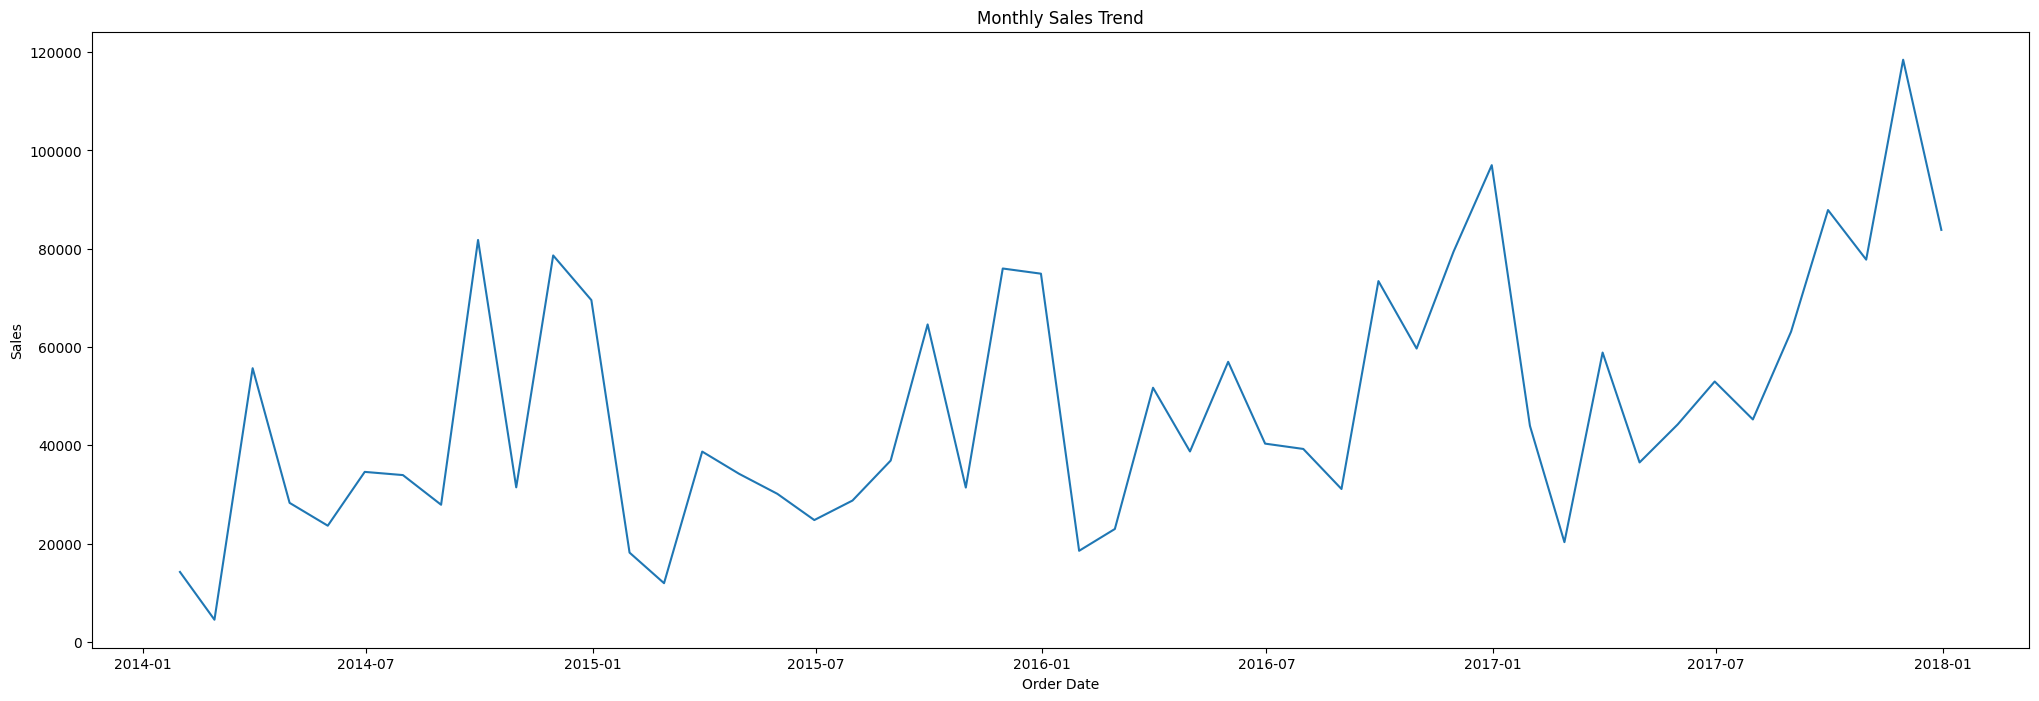

In [55]:
monthly_sales = df.groupby(["Order Date"], as_index=False).sum()
monthly_sales = monthly_sales.set_index("Order Date")
monthly_sales = monthly_sales.resample("M").sum()
plt.figure(figsize=(25,8))
plt.plot(monthly_sales['Sales'])
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.show()

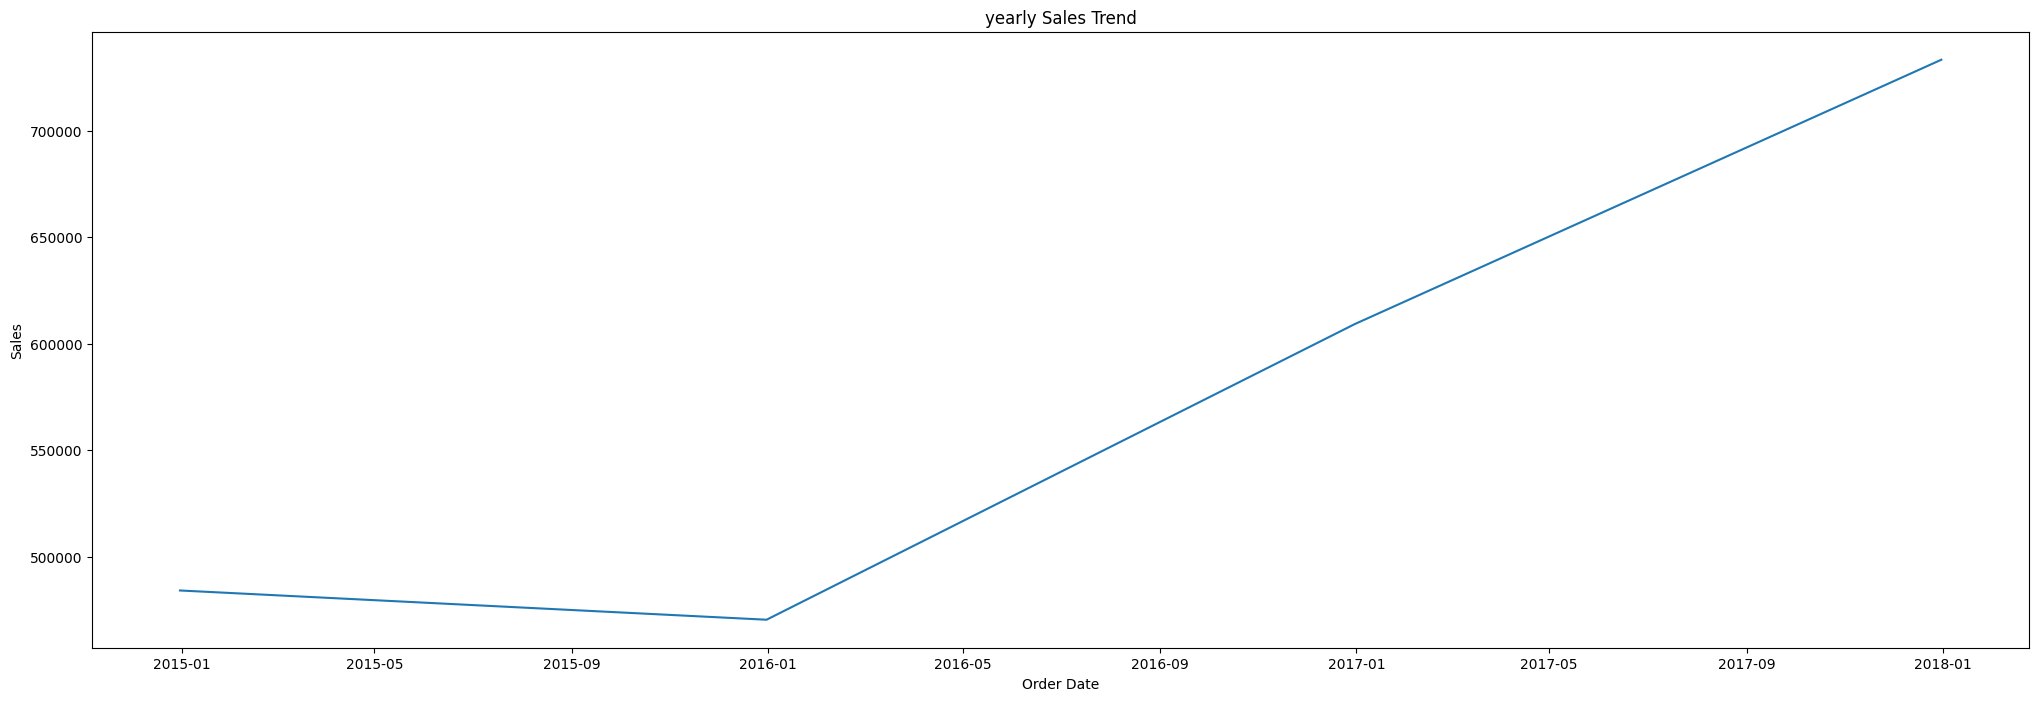

In [56]:
yearly_sales = monthly_sales.resample("Y").sum()
plt.figure(figsize=(25,8))
plt.plot(yearly_sales['Sales'])
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("yearly Sales Trend")
plt.show()

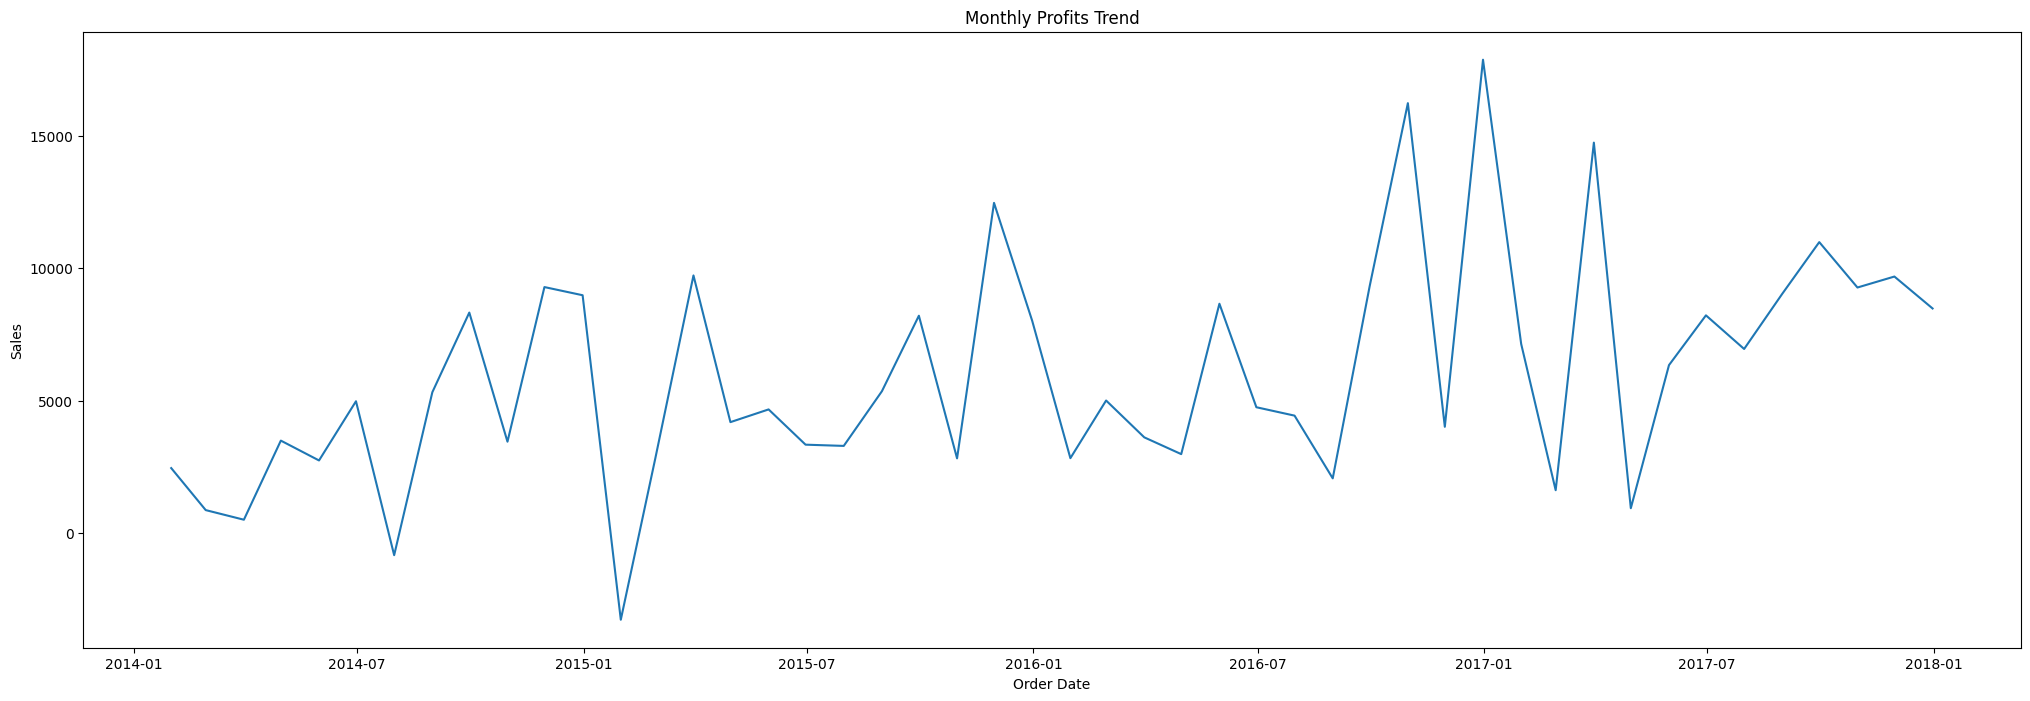

In [57]:
monthly_sales = df.groupby(["Order Date"], as_index=False).sum()
monthly_sales = monthly_sales.set_index("Order Date")
monthly_sales = monthly_sales.resample("M").sum()
plt.figure(figsize=(25,8))
plt.plot(monthly_sales['Profit'])
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("Monthly Profits Trend")
plt.show()

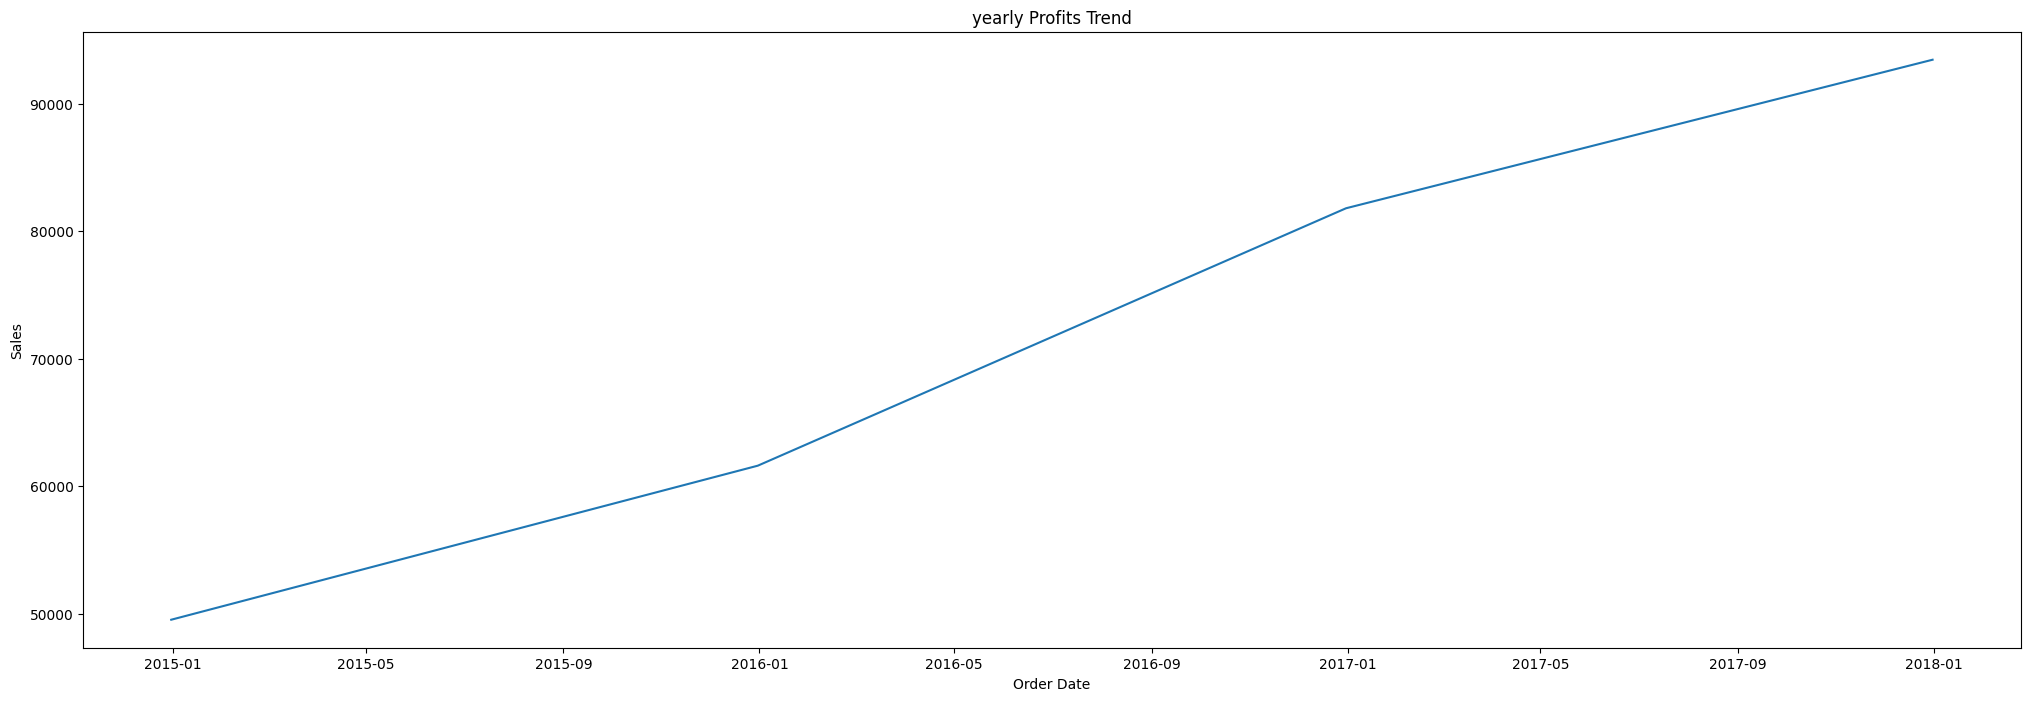

In [58]:
yearly_sales = monthly_sales.resample('Y').sum() 


plt.figure(figsize=(25,8))
plt.plot(yearly_sales['Profit'])
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("yearly Profits Trend")
plt.show()

### The general trend of the company is profit, but there are some periods in which profits decrease and then rise again. I think it's because of the discounts





## Segment analysis

In [59]:
df["Segment"].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [60]:
df["Ship Mode"].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [61]:
#pivot table for (segment,shipmode) by sales 
pivot_table = df.pivot_table(index='Segment', columns='Ship Mode', values='Sales', aggfunc='sum')
pivot_table

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,159168.9650,60596.359,231498.9496,710137.0714
Corporate,105858.4699,45121.323,146126.0388,409040.5351
Home Office,86400.9880,22645.443,81568.5810,239038.1365


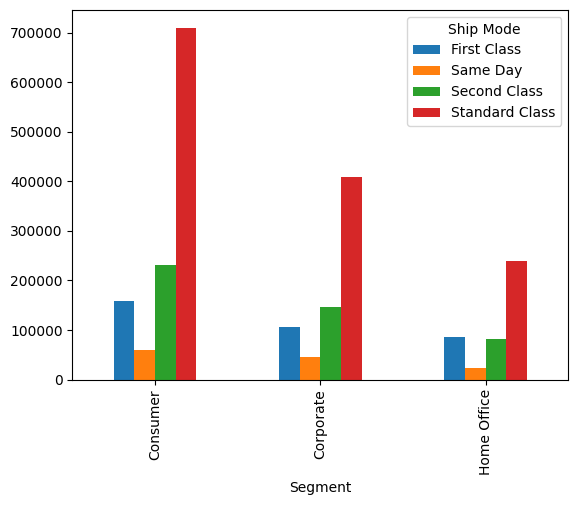

In [62]:
pivot_table.plot(kind='bar', stacked=False)
plt.show()

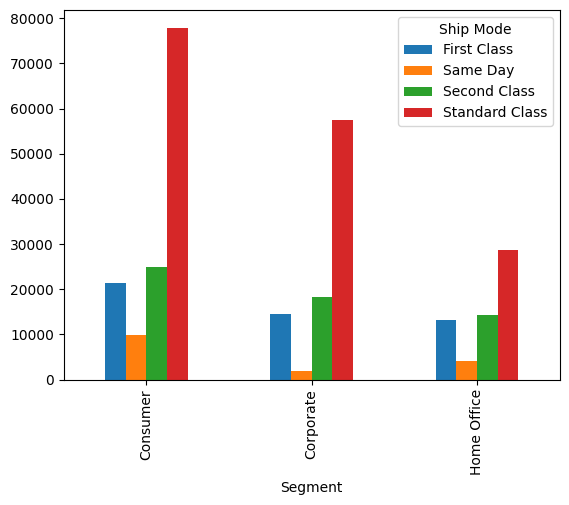

In [63]:
pivot_table = df.pivot_table(index='Segment', columns='Ship Mode', values='Profit', aggfunc='sum')
pivot_table.plot(kind='bar', stacked=False)
# Show the plot
plt.show()

In [64]:
df_segment = df[["Segment","Sales","Profit"]]

In [65]:
df_segment.head()

,Segment,Sales,Profit
0,Consumer,261.9600,41.9136
1,Consumer,731.9400,219.5820
2,Corporate,14.6200,6.8714
3,Consumer,957.5775,-383.0310
4,Consumer,22.3680,2.5164


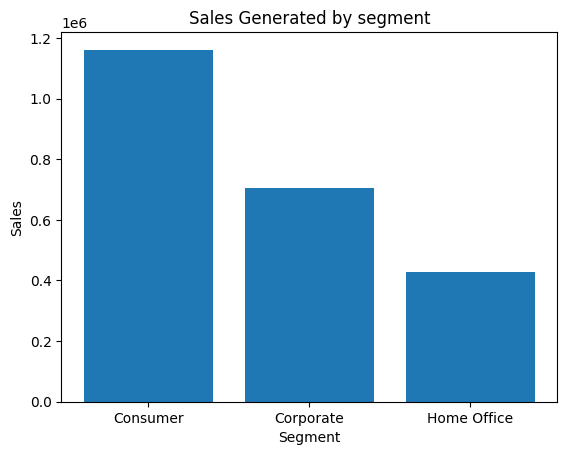

In [66]:
group_segment = df_segment.groupby(["Segment"],as_index=False).sum()
group_segment.sort_values(by="Sales",ascending=False,inplace=True)
plt.bar(group_segment['Segment'], group_segment['Sales'], align='center')
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.title("Sales Generated by segment")

plt.show()


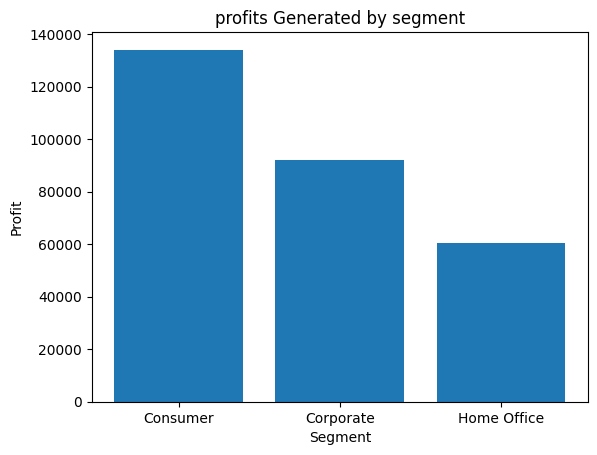

In [67]:
group_segment = df_segment.groupby(["Segment"],as_index=False).sum()
group_segment.sort_values(by="Profit",ascending=False,inplace=True)
plt.bar(group_segment['Segment'], group_segment['Profit'], align='center')
plt.xlabel("Segment")
plt.ylabel("Profit")
plt.title("profits Generated by segment")
plt.show()


### Consumers using standard-class shipping drive the majority of sales and profits.
### Standard-class shipping is the primary driver of sales and profits, primarily among consumers

# conclusion 

In [68]:
# count days 
Days = (df["Order Date"].max() - df["Order Date"].min()).days
Days

1457

In [69]:
total_sales = round(sum(df['Sales']), 2)
total_sales

2297200.86

In [70]:
total_quantity = df["Quantity"].sum()
total_quantity

37873

In [71]:
total_profit = round(sum(df['Profit']), 2)
total_profit

286397.02

In [72]:
print(f"""The data from this superstore spans over {Days} days with sales totaling at ${total_sales :,.0f} and a profit of ${total_profit :,.0f}.
There are {df['Product ID'].nunique()} unique articles in their inventory which are divided into {df['Category'].nunique()} categories, all of which are being sold across {df["State"].nunique()} states in the US.""")

The data from this superstore spans over 1457 days with sales totaling at $2,297,201 and a profit of $286,397.
There are 1862 unique articles in their inventory which are divided into 3 categories, all of which are being sold across 49 states in the US.


## Types of systems we can make on this dataset
### Sales forecasting
### Customer segmentation.
### Product recommendation.
### Anomaly detection.